# Paradigmas y Programación para Ciencia de Datos
## Programa 5


Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

Carlo Kiliano Ferrera Guadarrama, Aldo Sebastián Altamirano Vázquez, Edgar Omar Cruz Guitierrez, Leonardo Negrete Mancera

Implementa los siguientes estimadores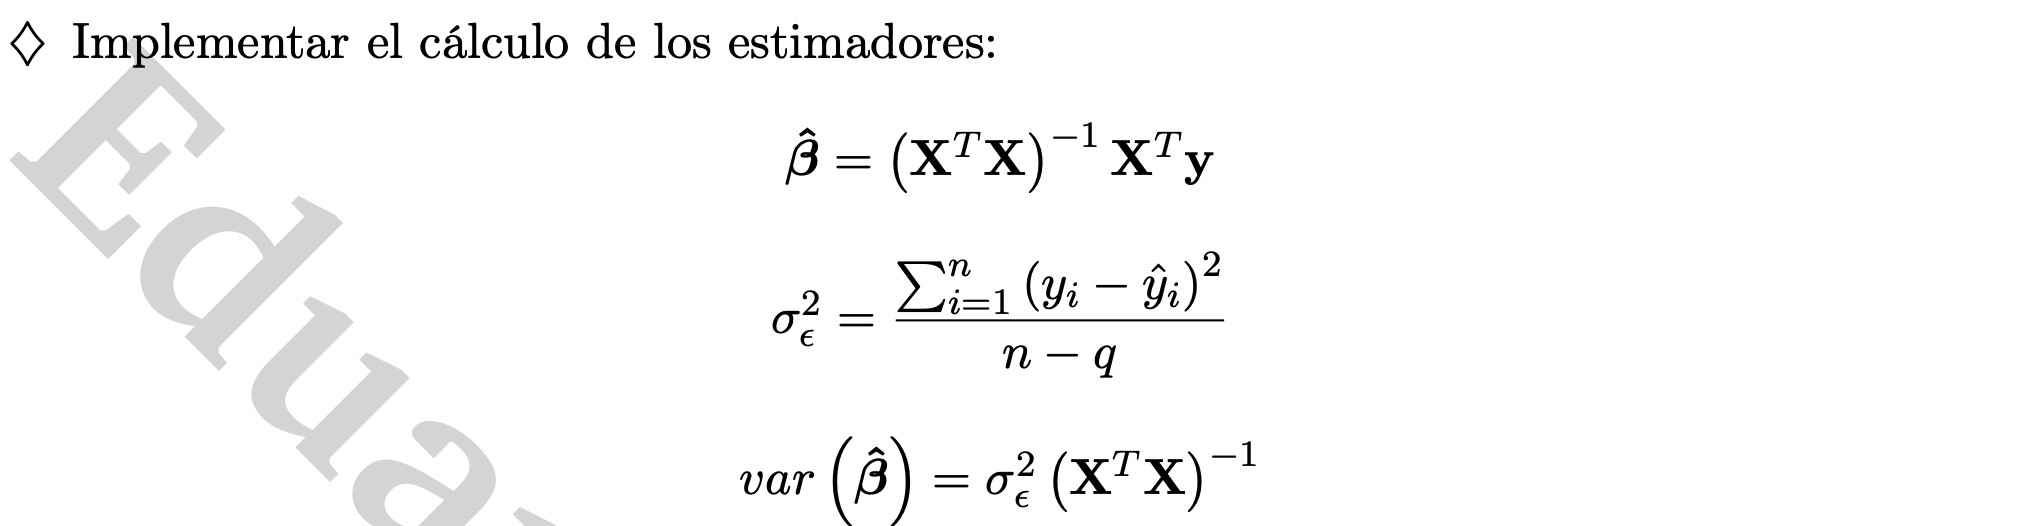

Estos estimadores están implementados en python

(Intercept),42.7005802
Prewt,0.5153804


[1] 58.25051

,(Intercept),Prewt
(Intercept),208.257693,-2.51732622
Prewt,-2.517326,0.03054699


Ignoring unknown labels:
• fill : "Tratamiento"


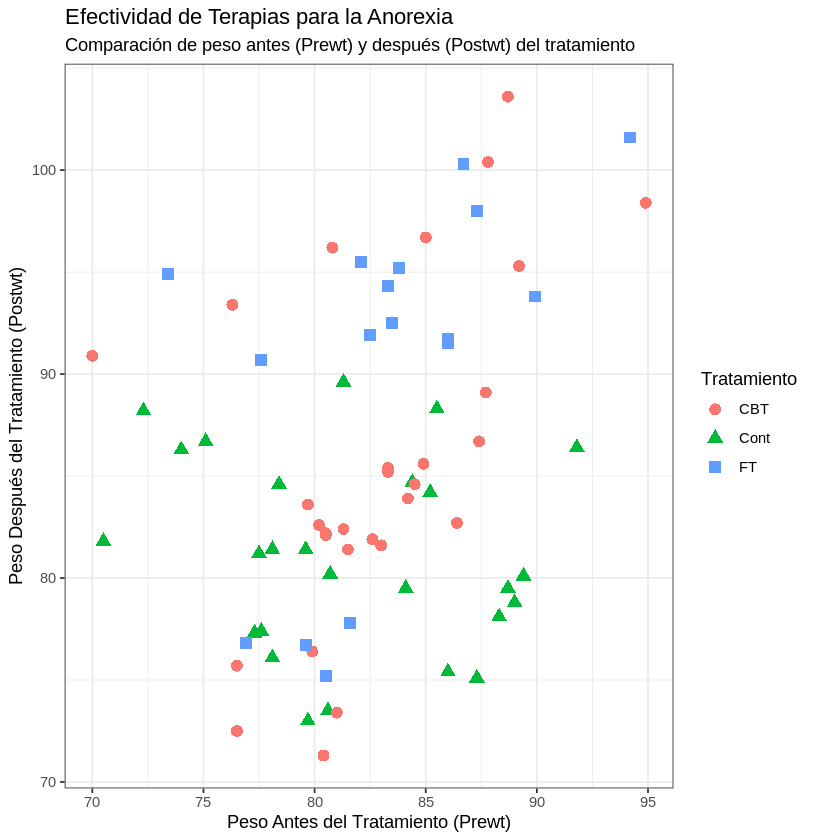

In [1]:
#Esta es la instrucción 1, sólo mostramos los puntos con diferentes colores y formas
library(MASS)
library(ggplot2)
#Cargamos los datos
data(anorexia)

X <- model.matrix(~ Prewt, data = anorexia)
y <- anorexia$Postwt

# β̂ = (X'X)^(-1) X'y
beta_hat <- solve(t(X) %*% X) %*% t(X) %*% y
beta_hat

# Valores ajustados y residuos
y_hat <- X %*% beta_hat
residuos <- y - y_hat

# σ̂² = Σ(yi - ŷi)^2 / (n - q)
n <- nrow(X)
q <- ncol(X)
sigma2_hat <- sum(residuos^2) / (n - q)
sigma2_hat

# var(β̂) = σ̂² (X'X)^(-1)
var_beta_hat <- sigma2_hat * solve(t(X) %*% X)
var_beta_hat


#Generamos la gráfica
ggplot(data = anorexia, aes(x = Prewt, y = Postwt)) +

  #Graficamos los puntos antes y después del tratamiento
  geom_point(aes(color = Treat, shape = Treat), size = 3) +


    #Damos formato
    labs(
    title = "Efectividad de Terapias para la Anorexia",
    subtitle = "Comparación de peso antes (Prewt) y después (Postwt) del tratamiento",
    x = "Peso Antes del Tratamiento (Prewt)",
    y = "Peso Después del Tratamiento (Postwt)",
    color = "Tratamiento",
    shape = "Tratamiento",
    fill = "Tratamiento"
  ) +
  theme_bw()

Este es el segundo y tercer punto de la tarea, agregamos las lineas de regresión por minimos cuadrados y la linea con pendiente 1

`geom_smooth()` using formula = 'y ~ x'


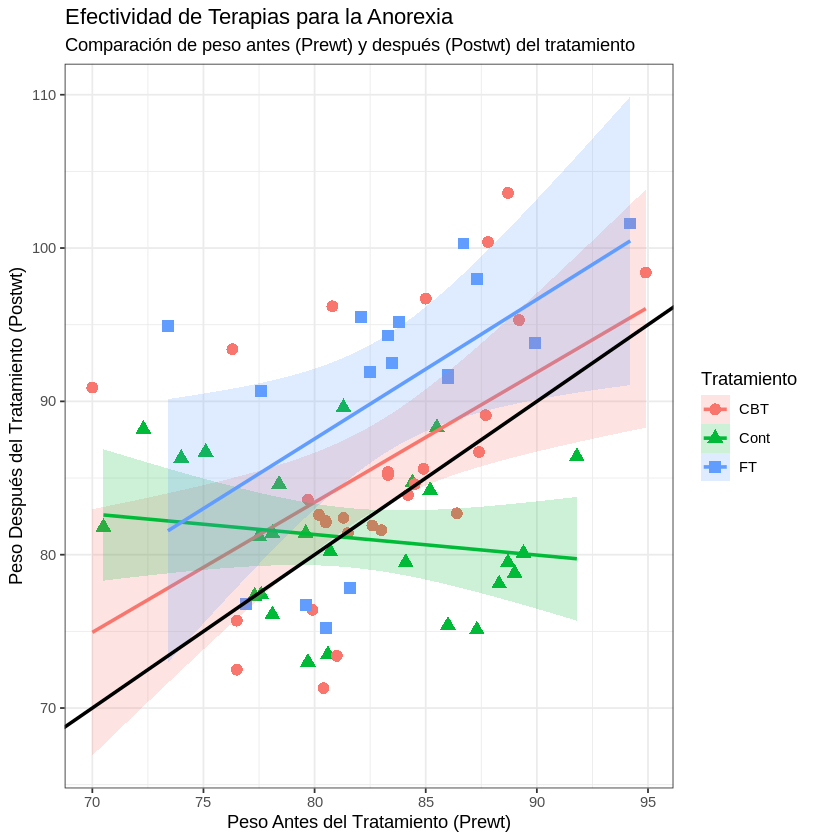

In [ ]:
#Generamos la gráfica
ggplot(data = anorexia, aes(x = Prewt, y = Postwt)) +

  geom_point(aes(color = Treat, shape = Treat), size = 3) +
  #Líneas de Regresión
  geom_smooth(aes(color = Treat, fill = Treat), method = "lm", alpha = 0.2) +


  #Línea con pendiente 1 e intercepto 0
  geom_abline(intercept = 0, slope = 1, linetype = "solid", color = "black", linewidth = 1) +

  #De nuevo le damos formato
  labs(
    title = "Efectividad de Terapias para la Anorexia",
    subtitle = "Comparación de peso antes (Prewt) y después (Postwt) del tratamiento",
    x = "Peso Antes del Tratamiento (Prewt)",
    y = "Peso Después del Tratamiento (Postwt)",
    color = "Tratamiento",
    shape = "Tratamiento",
    fill = "Tratamiento"
  ) +
  theme_bw()

#¿Se puede concluir algo sobre la eficacia de los tratamientos?

Podemos analizarlo de forma gráfica y la conclusión a la que llegariamos es que dado
que la línea azul correspondiente a FT tiene una inclinación mayor, hubo una mayor
ganancia de peso en ese grupo. Aunque la diferencia es modesta. Si comparamos
ambas con el grupo de control podemos notar que hay una mejoría marcada.

#Muestra el resumen de cada modelo de regresión ¿Para qué grupos existe evidencia de una relación entre los pesos? Explica la diferencia entre el grupo de control y los grupos con terapias; genera una conclusión al respecto

De los resumenes estadísticos podemos notar que tenemos valores bajos de $p-valor$ en los grupos de FT y CBT por lo que podemos concluir que
el peso previo al tratamiento es un predictor significativo del peso postratamiento, es decir que existe una relación lineal significativa en ambos casos. Por cada unidad de peso pretratamiento el peso postratamiento aumenta.

In [ ]:

modelo_CBT  <- lm(Postwt ~ Prewt, data = anorexia, subset = (Treat == "CBT"))
modelo_FT   <- lm(Postwt ~ Prewt, data = anorexia, subset = (Treat == "FT"))
modelo_Cont <- lm(Postwt ~ Prewt, data = anorexia, subset = (Treat == "Cont"))


summary(modelo_CBT)




Call:
lm(formula = Postwt ~ Prewt, data = anorexia, subset = (Treat == 
    "CBT"))

Residuals:
    Min      1Q  Median      3Q     Max 
-12.455  -3.720  -1.740   2.349  15.964 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  15.5772    23.9200   0.651  0.52041   
Prewt         0.8480     0.2888   2.936  0.00671 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.405 on 27 degrees of freedom
Multiple R-squared:  0.242,	Adjusted R-squared:  0.214 
F-statistic: 8.622 on 1 and 27 DF,  p-value: 0.006713


In [ ]:
summary(modelo_FT)



Call:
lm(formula = Postwt ~ Prewt, data = anorexia, subset = (Treat == 
    "FT"))

Residuals:
    Min      1Q  Median      3Q     Max 
-12.812  -2.759   1.760   4.187  13.343 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  14.8198    30.6500   0.484   0.6357  
Prewt         0.9092     0.3676   2.473   0.0258 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.377 on 15 degrees of freedom
Multiple R-squared:  0.2897,	Adjusted R-squared:  0.2423 
F-statistic: 6.117 on 1 and 15 DF,  p-value: 0.02584


In [ ]:
summary(modelo_Cont)


Call:
lm(formula = Postwt ~ Prewt, data = anorexia, subset = (Treat == 
    "Cont"))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3570 -3.7048 -0.5507  3.8755  8.4577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  92.0515    13.6900   6.724 5.91e-07 ***
Prewt        -0.1342     0.1675  -0.801    0.431    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.779 on 24 degrees of freedom
Multiple R-squared:  0.02606,	Adjusted R-squared:  -0.01453 
F-statistic: 0.6421 on 1 and 24 DF,  p-value: 0.4308


`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = Postwt ~ Prewt, data = anorexia, subset = (Treat == 
    "CBT"))

Residuals:
    Min      1Q  Median      3Q     Max 
-12.455  -3.720  -1.740   2.349  15.964 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  15.5772    23.9200   0.651  0.52041   
Prewt         0.8480     0.2888   2.936  0.00671 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.405 on 27 degrees of freedom
Multiple R-squared:  0.242,	Adjusted R-squared:  0.214 
F-statistic: 8.622 on 1 and 27 DF,  p-value: 0.006713



Call:
lm(formula = Postwt ~ Prewt, data = anorexia, subset = (Treat == 
    "FT"))

Residuals:
    Min      1Q  Median      3Q     Max 
-12.812  -2.759   1.760   4.187  13.343 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  14.8198    30.6500   0.484   0.6357  
Prewt         0.9092     0.3676   2.473   0.0258 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.377 on 15 degrees of freedom
Multiple R-squared:  0.2897,	Adjusted R-squared:  0.2423 
F-statistic: 6.117 on 1 and 15 DF,  p-value: 0.02584



Call:
lm(formula = Postwt ~ Prewt, data = anorexia, subset = (Treat == 
    "Cont"))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3570 -3.7048 -0.5507  3.8755  8.4577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  92.0515    13.6900   6.724 5.91e-07 ***
Prewt        -0.1342     0.1675  -0.801    0.431    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.779 on 24 degrees of freedom
Multiple R-squared:  0.02606,	Adjusted R-squared:  -0.01453 
F-statistic: 0.6421 on 1 and 24 DF,  p-value: 0.4308


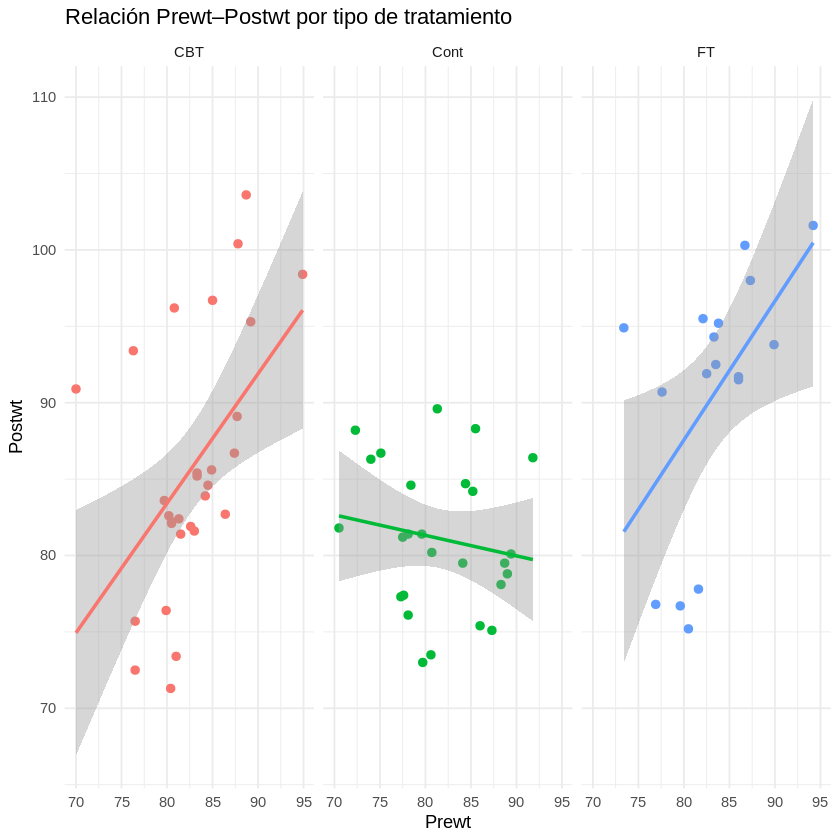

In [ ]:

plt_facet <- ggplot(anorexia, aes(x = Prewt, y = Postwt, colour = Treat)) +
  geom_point(size = 2) +
  geom_smooth(method = "lm", se = TRUE) +
  facet_grid(. ~ Treat) +
  scale_colour_discrete(guide = "none") +
  labs(title = "Relación Prewt–Postwt por tipo de tratamiento") +
  theme_minimal()

plt_facet

modelo_CBT  <- lm(Postwt ~ Prewt, data = anorexia, subset = (Treat == "CBT"))
modelo_FT   <- lm(Postwt ~ Prewt, data = anorexia, subset = (Treat == "FT"))
modelo_Cont <- lm(Postwt ~ Prewt, data = anorexia, subset = (Treat == "Cont"))

# Resúmenes
summary(modelo_CBT)
summary(modelo_FT)
summary(modelo_Cont)
